# **Waze User Churn: Exploratory Data Analysis**

This notebook explores the Waze churn dataset to understand user behavior patterns, data quality, and early signals related to churn. The focus is on visualizing key features, examining distributions and outliers, and generating hypotheses for subsequent statistical modeling and machine learning.

## **Imports and data loading**

Core Python libraries for data manipulation and visualization are imported, and the Waze dataset is loaded into a pandas DataFrame.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


The dataset contains user‑level behavioral and profile features along with a churn label indicating whether the user retained or churned during the observation period.

## **Data exploration and quality assessment**

Before deeper analysis, relevant columns, potential exclusions, missing values, and outliers are reviewed to understand data quality and modeling suitability.

- The `label` column is essential, as it indicates whether a user churned.
- Behavioral variables such as sessions, drives, distance, and driving days are central for understanding engagement and churn risk.
- The user identifier (`ID`) is removed for analysis because it does not carry behavioral information.
- Missing churn labels and extreme values are assessed to decide how they should be handled in later modeling steps.

### **Initial data exploration**

Basic pandas methods provide a quick view of the dataset’s structure and contents.
- `head()` previews the first few rows.
- `size` gives the total number of elements.
- `describe()` summarizes numeric distributions.
- `info()` confirms data types and non‑null counts.

In [43]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [44]:
df.size

194987

In [45]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


## **Outlier identification and treatment**

Many behavioral variables are heavily right‑skewed, with a small subset of users showing extremely high usage. Outliers can heavily influence summary statistics and model performance, so they are identified and considered carefully.

Typical approaches include:
- Retaining outliers for EDA and robust models.
- Removing clearly impossible values or data entry errors.
- Capping extreme values at a high percentile (winsorization) to reduce undue influence while keeping all records.

### **Visualizing the data**

With relevant columns identified, the next step is to explore the data visually to better understand patterns, relationships, and potential outliers. Different types of visualizations can reveal unique insights depending on the nature of each variable. 

Chosen visualizations:
 - Box plots - to identify outliers and examine the spread of numerical data
 - Histograms - to understand the distribution of key variables
 - Scatter plots - to explore relationships and correlations between variables
 - Bar charts - to compare categorical data and display frequency counts

Starting with box plots and histograms provides a clear view of how the data is distributed before moving into more complex comparisons. 

### **`sessions`**

Number of app opens during the month

Text(0.5, 1.0, 'sessions boxplot')

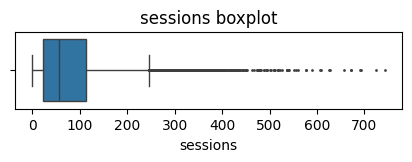

In [47]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions boxplot')

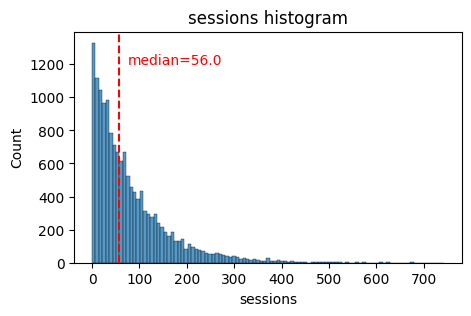

In [48]:
# Histogram
plt.figure(figsize=(5,3))
sns.histplot(x = df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200,'median=56.0',color='red')
plt.title('sessions histogram')
plt.show()

`sessions` is strongly right‑skewed: half of users opened the app around 50–60 times or fewer during the month, while a small subset recorded several hundred sessions, indicating very heavy usage.

### **`drives`**

Number of drives of at least 1 km during the month


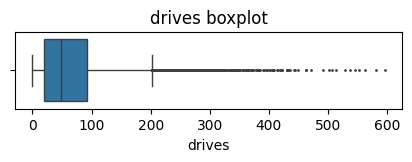

In [49]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('drives boxplot')
plt.show()

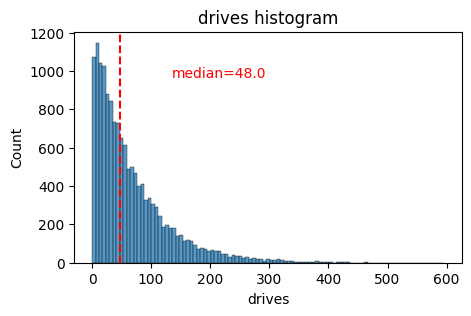

In [50]:
# Histogram
def histogrammer(column_str, median_text=True, **kwargs): # **kwargs = any keyword arguments from the sns histplot funciton
    median = round(df[column_str].median(),1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)
    plt.axvline(median, color = 'red', linestyle = '--')
    if median_text==True:
        ax.text(0.25,0.85,f'median={median}', color='red', ha='left',va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram')
    plt.show();
    
    
histogrammer('drives')
    


`drives` shows a similar right‑skewed, approximately log‑normal pattern, with most users taking relatively few trips per month and a small group driving more than 400 times.

### **`total_sessions`**

Model estimate of total sessions since onboarding


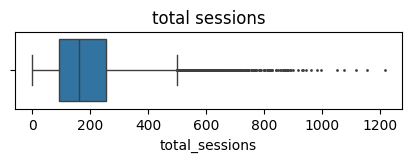

In [51]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'],fliersize=1)
plt.title('total sessions')
plt.show()

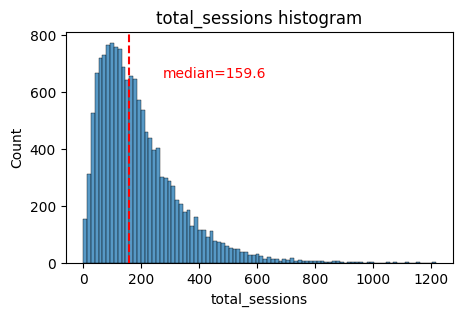

In [52]:
# Histogram
histogrammer('total_sessions')

`total_sessions` is also right‑skewed, with a median around 160 total sessions compared with a median of roughly 50 sessions in the last month, indicating that a substantial portion of historical engagement occurs in the most recent period for many users.

### **`n_days_after_onboarding`**

Number of days since the user signed up

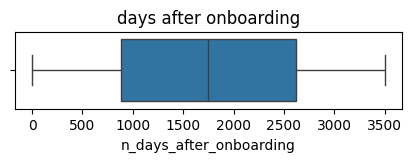

In [53]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('days after onboarding')
plt.show()

Median: 1741.0


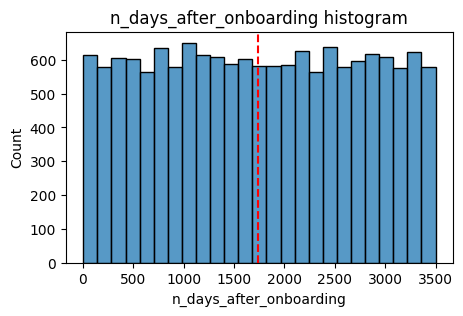

In [54]:
# Histogram
histogrammer('n_days_after_onboarding',median_text=False)

User tenure is approximately uniform from recent sign‑ups to long‑standing users of nearly 9.5 years, suggesting no strong over‑representation of either new or legacy users in the dataset.

### **`driven_km_drives`**

Total kilometers driven during the month

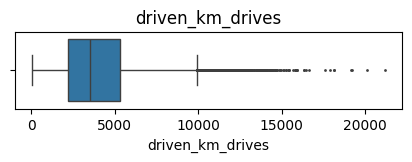

In [55]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('driven_km_drives')
plt.show()

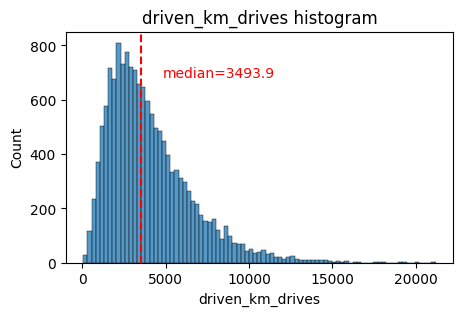

In [56]:
# Histogram
histogrammer('driven_km_drives')

Monthly distance driven is highly skewed, with half of users driving under roughly 3,500 km but some exceeding extremely large distances, in some cases more than half the circumference of the Earth in a single month. This highlights both very heavy users and likely professional or long‑haul segments, rather than only typical commuters.

### **`duration_minutes_drives`**

Total minutes driven during the month

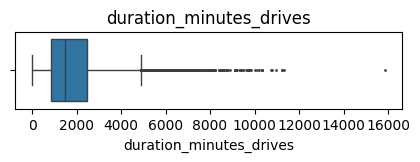

In [57]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'],fliersize=1)
plt.title('duration_minutes_drives')
plt.show()

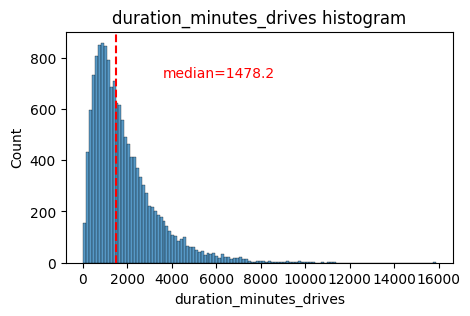

In [58]:
# Histogram
histogrammer('duration_minutes_drives')

`duration_minutes_drives` exhibits a heavily right‑skewed tail: half of users drive less than about 1,500 minutes (around 25 hours) per month, while a small group drives more than 250 hours. Together with distance, this reinforces the presence of a high‑intensity “super‑driver” segment that is heavily represented in this dataset.

### **`activity_days`**

Number of days the user opened the app during the month

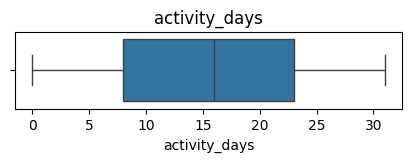

In [59]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'],fliersize=1)
plt.title('activity_days')
plt.show()

Median: 16.0


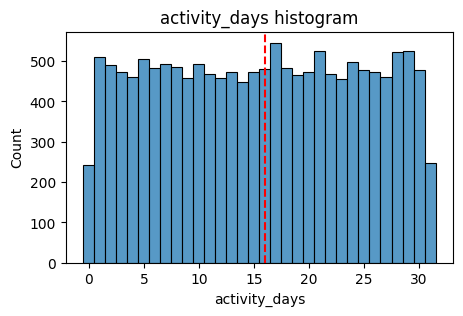

In [60]:
# Histogram
histogrammer('activity_days',median_text=False,discrete=True)

In the last month, users opened the app a median of about 16 days.
- The boxplot indicates a roughly centered distribution across the month.  
- The histogram shows that around 500 users opened the app on each specific number of days, while approximately 250 users did not open the app at all and another 250 users opened the app every day.

This distribution is particularly interesting because it does not mirror the `total_sessions` distribution, even though a strong correlation might be expected between the number of sessions and the number of active days. This suggests that some users may cluster many sessions into a few days, while others open the app consistently but less frequently, revealing distinct engagement styles that may relate differently to churn.

#### **`driving_days`**

Number of days the user drives (at least 1 km) during the month

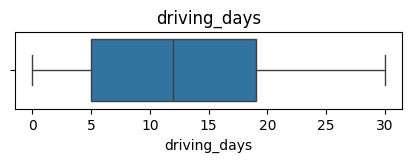

In [61]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'],fliersize=1)
plt.title('driving_days')
plt.show()

Median: 12.0


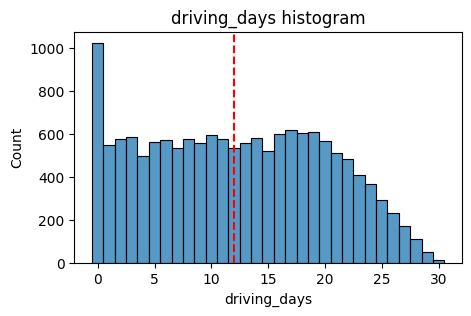

In [62]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is roughly uniform and generally aligns with the number of days they opened the app, though the `driving_days` distribution tapers off at higher values.

Nearly twice as many users (about 1,000 vs. 550) did not drive at all during the month. This contrasts with `activity_days`, where around 500 users opened the app on most day counts, roughly 250 users did not open the app at all, and about 250 users opened the app every day.

This discrepancy between app activity and actual driving behavior is notable and should be explored further. It suggests that some users engage with Waze primarily for planning or information without driving, while others rely on it during active driving, indicating distinct engagement patterns.

#### **`device`**

_The type of device a user starts a session with_

Since this variable is categorical and binary, a box plot is not appropriate. A pie chart or bar chart is more suitable for visualizing the proportion of each category, allowing for a clear view of how the two groups are distributed within the dataset. 

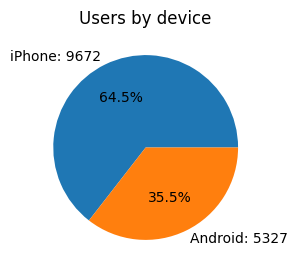

In [63]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data = df['device'].value_counts()
plt.pie(data,
       labels=[f'{data.index[0]}: {data.values[0]}',
              f'{data.index[1]}: {data.values[1]}'],
       autopct='%1.1f%%')
plt.title('Users by device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

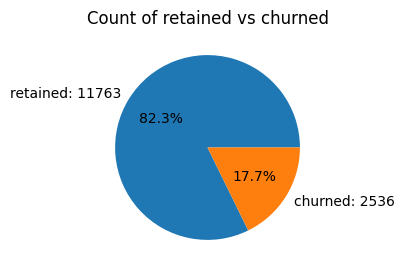

In [64]:
# Pie chart
fig = plt.figure(figsize=(3,3))
data = df['label'].value_counts()
plt.pie(data,
       labels=[f'{data.index[0]}: {data.values[0]}',
              f'{data.index[1]}: {data.values[1]}'],
       autopct='%1.1f%%')
plt.title('Count of retained vs churned');

Less than 18% of the users churned.

#### **Comparing `driving_days` and `activity_days`**

Both `driving_days` and `activity_days` measure counts of days within a month and are closely related. Plotting them together in a single histogram allows for a direct comparison and makes it easier to spot patterns or discrepancies between app usage and actual driving activity. 

Each day on the x-axis can display two bars: one for `driving_days` and one for `activity_days`, showing how the distributions align or differ across the user base. 


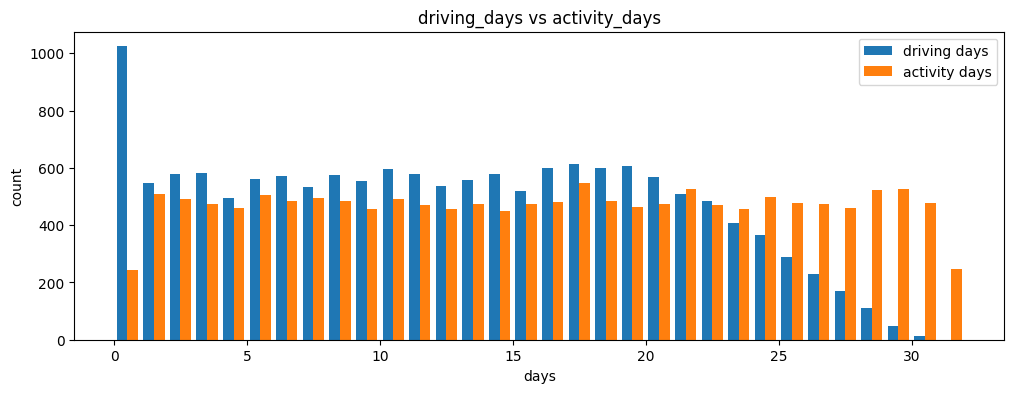

In [65]:
# Histogram
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'],df['activity_days']],
        bins=range(0,33),
        label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs activity_days');

The earlier observation raises an interesting question: why are there fewer users who didn’t use the app at all and more users who didn’t drive at all during the month?

While the two variables are clearly related, they’re not identical. Users may open the app for purposes other than driving-such as checking routes, traffic conditions, or account settings-and some might even open it unintentionally.

To understand this discrepancy, it’s useful to confirm whether the two variables are measured over the same number of days. Checking the maximum values for both `driving_days` and `activity_days` will help determine if differences in scale or measurement are contributing to the observed mismatch.

In [66]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


The results suggest that the maximum value for `driving_days` is less than the total number of days in the month. While it’s technically possible that no user drove every single day, this seems unlikely given the dataset includes around 15,000 users.

To further assess the validity and relationship between these two variables, a scatter plot can be helpful. By plotting one variable on the x-axis and the other on the y-axis, we can visually inspect how closely `driving_days` and `activity_days` align and identify any inconsistencies or unexpected patterns.

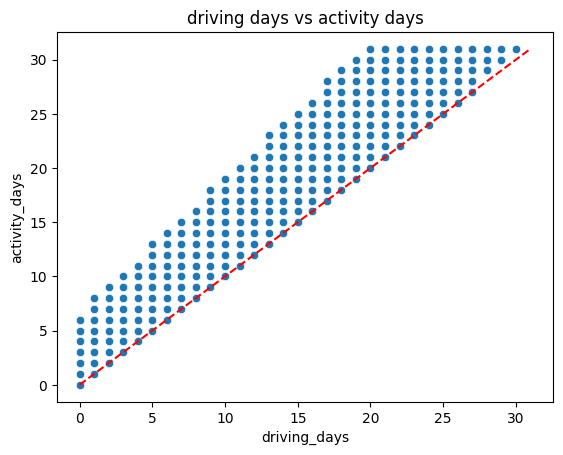

In [67]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving days vs activity days')
plt.plot([0,31],[0,31], color='red', linestyle = '--');

There is a logical constraint between these two variables: if a user drives on a given day, they must have also used the app that day. This means driving_days can never exceed activity_days.

The scatter plot confirms that this theoretical rule holds true - no data points show more driving days than activity days. This consistency supports the validity of both variables and indicates that the data has been recorded correctly in this respect.

#### **Device Type and User Retention**

To explore whether user retention differs by device type, create a histogram with four bars, representing each combination of device and churn label:
- iPhone users retained
- iPhone users churned
- Android users retained
- Android users churned

This visualization helps compare retention patterns across platforms and identify whether one group of users tends to stay active longer than the other.

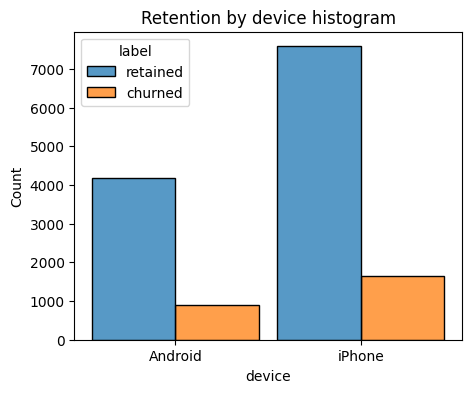

In [68]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
            x = 'device',
            hue = 'label',
            multiple='dodge',
            shrink = 0.9)
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

To explore driving behavior in relation to user retention, calculate the average distance driven per driving day for each user. This provides insight into whether driving intensity or trip frequency influences churn.

A new column, `km_per_driving_day`, can be created to store this value for each user.
Afterward, using the describe() method on this column summarizes its distribution and helps compare typical driving patterns between retained and churned users.

In [69]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives']/df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

**Handling infinite values in `km_per_driving_day`**

When I first computed `km_per_driving_day` the summary showed `inf` (and `std` as `NaN`). That was caused by dividing `driven_km_drives` by `driving_days` when `driving_days == 0`, which produces infinite values and breaks descriptive statistics.

What I did:
- Replaced infinite values with 0 so that "no driving" is represented sensibly and summary statistics remain meaningful.
- I handled both positive and negative infinity (or used `np.isinf`) to be safe.

Example of the replacement I ran:


In [70]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

**Filtering Unrealistic Driving Distances**<br>
After reviewing the data, some users showed a maximum of 15,420 km per driving day, which is clearly unrealistic; even driving 12 hours a day at 100 km/h would only reach around 1,200 km. Values above this threshold are treated as anomalies or special cases and either filtered or capped so that the analysis focuses on plausible driving behavior.

A histogram of the cleaned `km_per_driving_day` values, plotted with `multiple="fill"` for the churn label, shows the proportion of churned versus retained users across distance ranges. This makes it easier to see how heavier daily driving intensity relates to retention and churn.

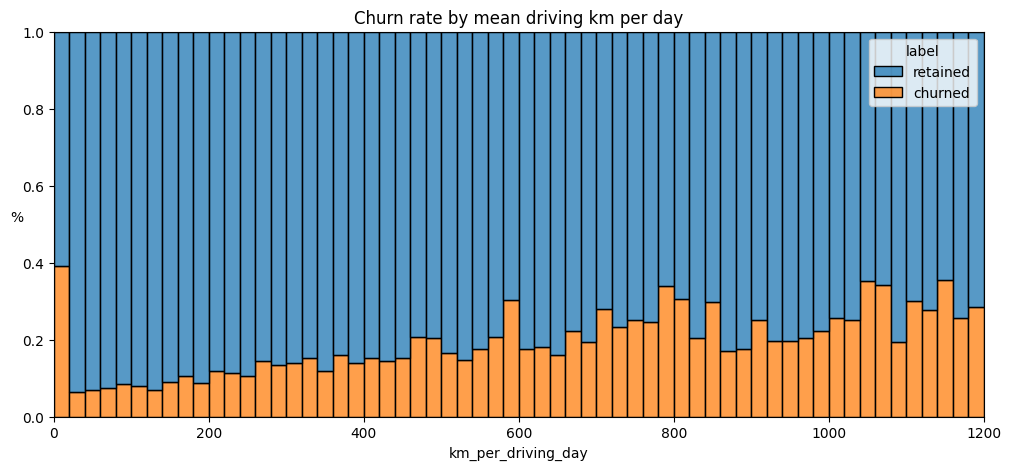

In [71]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x = 'km_per_driving_day',
             bins = range(0,1201,20),
             hue = 'label',
             multiple= 'fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean driving km per day');

Churn rate increases with higher average daily driving distance, consistent with earlier findings. It may be worth exploring why long-distance drivers are more likely to stop using the app.

#### **Churn rate per number of driving days**

To explore how driving frequency relates to retention, I plotted another histogram—this time showing churn rates by number of driving days. The visualization helps reveal whether users who drive more often are more or less likely to churn.

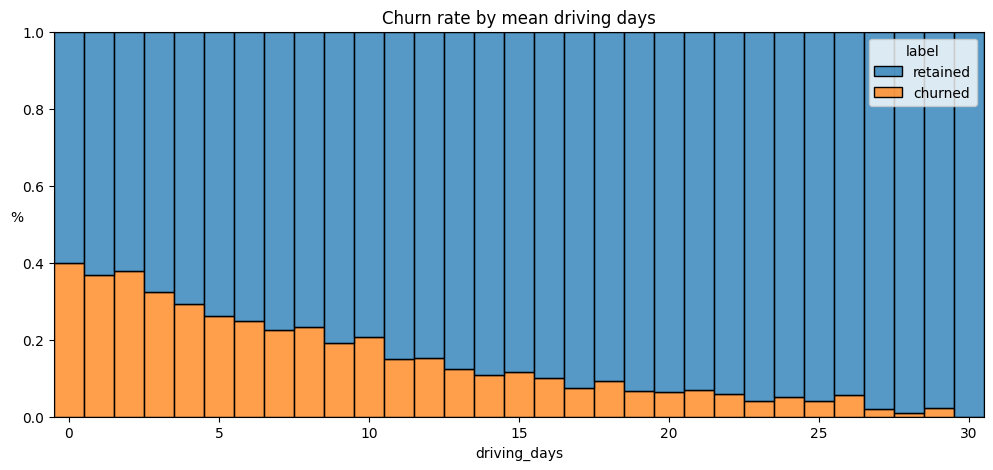

In [72]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x = 'driving_days',
             bins = range(1,32),
             hue = 'label',
             multiple= 'fill',
             discrete = True)
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean driving days');

**Churn Trends by App Usage**

Churn is highest among users who used Waze the least in the past month: about 40% of users who did not use the app at all churned, while no users who used it every day did. As the number of driving days increases, the proportion of churned users steadily decreases, indicating that frequent drivers are more engaged and more likely to be retained.

This pattern is intuitive: active users are more likely to see ongoing value in the app, whereas inactive users may have changed their travel behavior, reduced driving altogether, or switched to other solutions such as public transit or alternative navigation tools.


#### **Proportion of sessions that occurred in the last month**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [73]:
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']

The median value of the new column is:

In [74]:
df['percent_sessions_in_last_month'].median()

np.float64(0.42309702992763176)

I plotted a histogram to visualize the distribution of `percent_sessions_in_last_month` by churn label. This shows how users differ in the share of their lifetime sessions that occurred in the last month and highlights any clustering among recently active users.

Median: 0.4


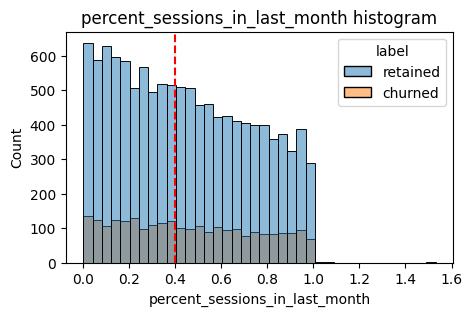

In [75]:
# Histogram
histogrammer('percent_sessions_in_last_month',
            hue = df['label'],
            multiple='layer',
            median_text = False)

In [76]:
df['n_days_after_onboarding'].median()

np.float64(1741.0)

Half of the users had 40% or more of their total sessions in the last month, despite the median time since onboarding being nearly five years.

To examine this group, I plotted a histogram of `n_days_after_onboarding`, focusing only on users with high recent activity. This highlights how long-standing users can still show bursts of engagement.

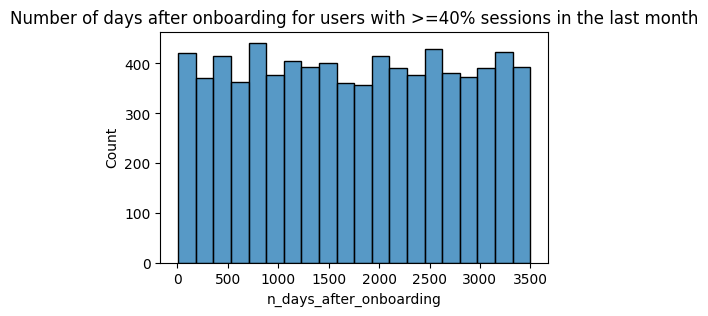

In [77]:
# Histogram
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('Number of days after onboarding for users with >=40% sessions in the last month');

The days since onboarding for users with 40% or more of their sessions in the last month shows a nearly uniform distribution. This is unusual and suggests that many long-term users suddenly increased their app usage. It may be worth consulting Waze to understand why this spike occurred.

### **Handling outliers**

Many variables show outliers due to right-skewed distributions, rather than data entry errors.

For certain analyses, it can be helpful to cap extreme values at a reasonable threshold. One approach is to use the 95th percentile of a column and replace values above it with that percentile.

This technique reduces the impact of extreme values while preserving the overall distribution shape, making analyses and visualizations more robust.

In [78]:
def outlier_imputer(column_name, percentile):
    #threshold calculation
    threshold = df[column_name].quantile(percentile)
    #impute threshold for values > threshold
    df.loc[df[column_name]>threshold, column_name] = threshold
    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Applying the function above to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [79]:
for column in ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']:
    outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998


Check if the function worked as expetced:

In [80]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,0.449255
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,0.286919
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,0.196221
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,0.423097
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,0.687216
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,1.530637


#### **Conclusion**

The overall churn rate is approximately 17%, consistent across both iPhone and Android users.

Exploring the data raises further questions. For example, many users suddenly had high activity in the last month—something worth discussing with the Waze data team.

EDA also shows that users who drive very long distances on driving days are more likely to churn, whereas users who drive more frequently are less likely to churn. Understanding this discrepancy presents another avenue for further investigation.

### **Results and Evaluation**

From the visualizations and analysis, several insights and questions emerged:

Key learnings:
- There is missing data in the user churn label that requires further investigation.
- Many variables, such as drives, contain outliers, suggesting the need to stabilize variation for analysis or modeling.
- Number of drives and total sessions are strongly correlated, potentially providing redundant information if both are used.
- On average, retained users have fewer drives than users who churned.

Additional questions:
- What causes the missing data in the churn labels?
- Who are the users with an extremely high number of drives?
- Why do retained users have fewer drives than churned users?
- What are the demographic characteristics of churned vs. retained users?

Client Perspective:
- Which variables are most strongly associated with user churn?
- Are there actionable insights or policies that could reduce churn?

These points highlight areas for deeper analysis and provide a starting point for recommendations to stakeholders.

In [81]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [82]:
### YOUR CODE HERE ###
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


### **Conclusion**

1. Distributions:
Most behavioral variables are right‑skewed, with many users showing relatively low activity and a smaller group exhibiting extremely high usage (sessions, drives, distance, and duration). A few variables, such as `n_days_after_onboarding`, are closer to uniform, indicating that both new and long‑tenure users are well represented in the dataset.

2. Data quality:
Overall, the dataset appears reliable, but `driven_km_drives` contains physically improbable values and derived metrics like `km_per_driving_day` initially produced infinite values when dividing by zero driving days. The mismatch between high values of `driving_days` and `activity_days` raises questions about measurement windows and user behavior that are worth clarifying with Waze.

3. Churn breakdown:
Roughly 17–18% of users churned, while 82–83% were retained, and this churn rate is consistent across iPhone and Android users.

4. Behavioral drivers of churn:
Users who drive very long distances per driving day are more likely to churn, while those who drive more frequently (more driving days) are less likely to churn, suggesting that frequency of use signals retention, whereas long‑distance, high‑intensity driving may relate to different situational or behavioral churn factors.

5. Engagement patterns and tenure:
Half of users record 40% or more of their lifetime sessions in the last month, despite a median tenure of nearly five years, and these highly active users span the full tenure range. This indicates recent surges in activity across cohorts, not just among new users, and is a key point to investigate further with the Waze team.

6. Open questions:
The EDA raises several questions for future analysis: what drives missing churn labels; who are the extreme “super‑drivers”; why do retained users sometimes have fewer drives than churned users; and how product or environmental changes might explain sudden increases in recent usage. These questions guide the next steps in statistical testing and predictive modeling.
